In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime
import os
from unidecode import unidecode

In [2]:
files = ['homicidios-accidentes-transito-' + str(i) + '.xlsx' for i in range(2010, 2020)]
all_dfs = []

for file in files:
    temp = pd.read_excel(file)
    
    # Eliminar acentos en el nombre de las columnas
    temp.columns = [unidecode(str(col)) for col in temp.columns]

    # Reemplazar espacios por _
    temp.columns = temp.columns.str.replace(' ', '_')
    
    # Strip
    temp.columns = temp.columns.str.strip()

    # Reemplazar espacios por _
    temp.columns = temp.columns.str.lower()

#     Reemplazar NaN, None
    temp.replace('-', np.nan, inplace=True)

    # Set axis name
    temp.rename_axis('id', inplace=True)
    
    all_dfs.append(temp)

In [3]:
renaming={
    'clase_sitio':'clase_de_sitio',
    'pais_nace':'pais_de_nacimiento',
    'clase_empleado':'clase_de_empleado'
}

for i in range(len(all_dfs)):
    all_dfs[i].rename(columns=renaming, inplace=True)
    
df_f = pd.concat(all_dfs, axis=0)
df_f.drop(columns=['2012','2010','2011'], inplace=True)

In [4]:
df_f.columns

Index(['fecha', 'departamento', 'municipio', 'dia', 'hora', 'barrio', 'zona',
       'clase_de_sitio', 'arma_empleada', 'movil_agresor', 'movil_victima',
       'edad', 'sexo', 'estado_civil', 'pais_de_nacimiento',
       'clase_de_empleado', 'escolaridad', 'codigo_dane', 'profesion',
       'cantidad'],
      dtype='object')

In [6]:
df_f.shape

(50973, 20)

In [7]:
df_f.edad.unique()
df_f.edad.replace('NO REPORTADO', np.nan, inplace=True)
df_f.edad = df_f.edad.astype(float)

In [8]:
df_f.municipio.replace(' \(CT\)', '', regex=True, inplace=True)

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams.keys()

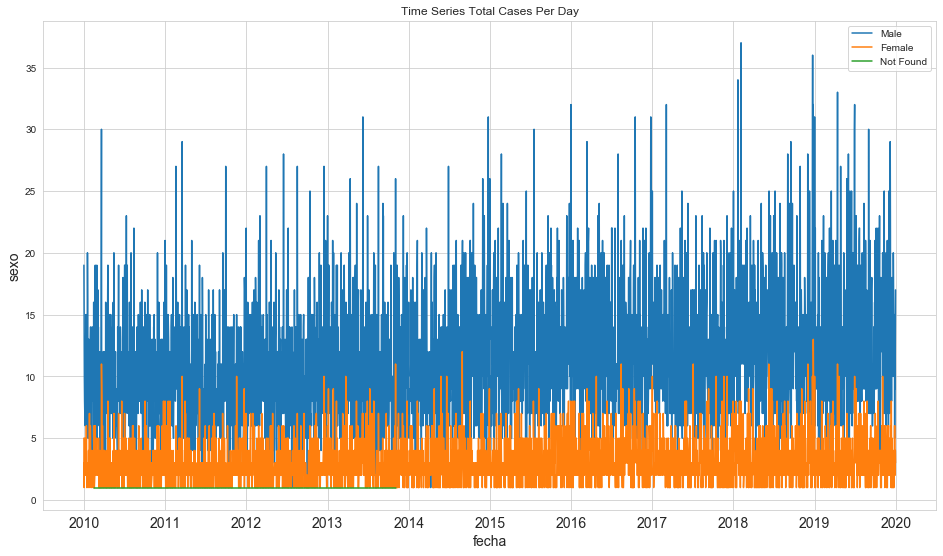

In [11]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(
    data=df_f.groupby('fecha').apply(lambda df: df.sexo.value_counts()).reset_index(),
    x='fecha',
    y='sexo',
    hue='level_1'
)

ax.set_title('Time Series Total Cases Per Day');
ax.legend(['Male', 'Female', 'Not Found']);

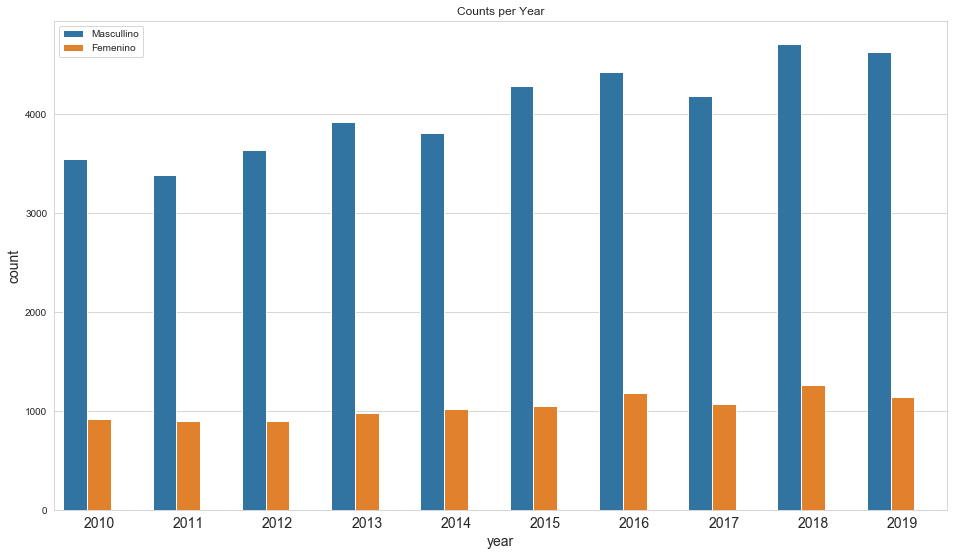

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f.assign(year = lambda df: df.fecha.dt.year),
    x='year',
    hue='sexo'
)

ax.set_title('Counts per Year');
ax.legend(['Mascullino', 'Femenino']);

In [14]:
df_f['departamento'].value_counts()

CUNDINAMARCA          8584
VALLE                 6890
ANTIOQUIA             6309
SANTANDER             2566
CESAR                 2100
TOLIMA                1943
CAUCA                 1760
CÓRDOBA               1738
ATLÁNTICO             1646
HUILA                 1636
NORTE DE SANTANDER    1585
BOLÍVAR               1533
BOYACÁ                1529
NARIÑO                1447
META                  1394
MAGDALENA             1352
RISARALDA             1185
GUAJIRA               1033
CALDAS                1008
CASANARE               865
QUINDÍO                761
SUCRE                  730
ARAUCA                 411
CAQUETÁ                358
PUTUMAYO               241
CHOCÓ                  156
SAN ANDRÉS             111
VICHADA                 45
GUAVIARE                35
AMAZONAS                13
GUAINÍA                  7
VAUPÉS                   2
Name: departamento, dtype: int64

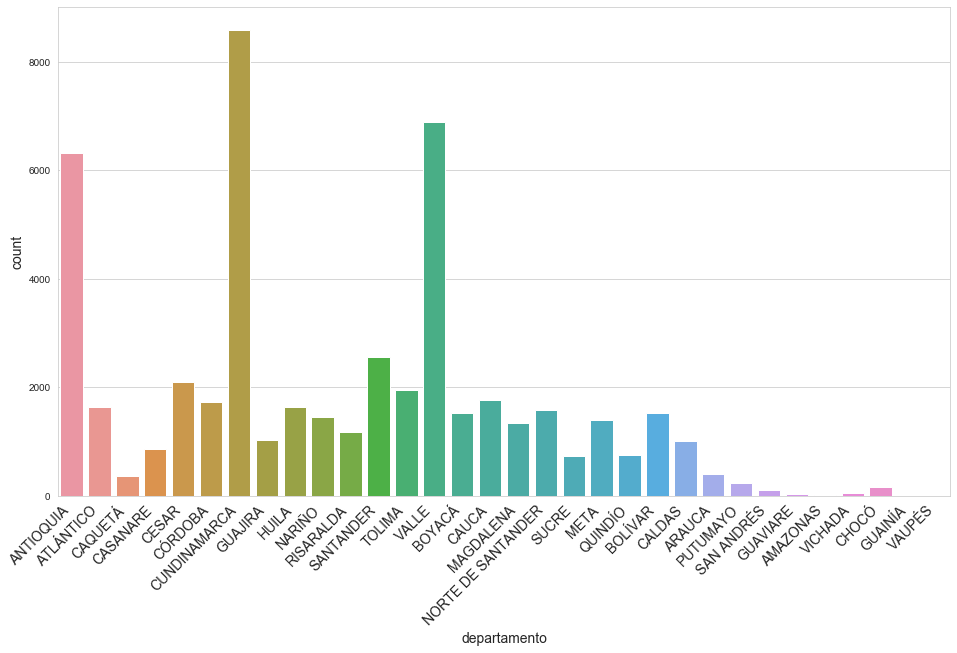

In [13]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f,
    x='departamento'
)

plt.xticks(rotation=45,ha='right');

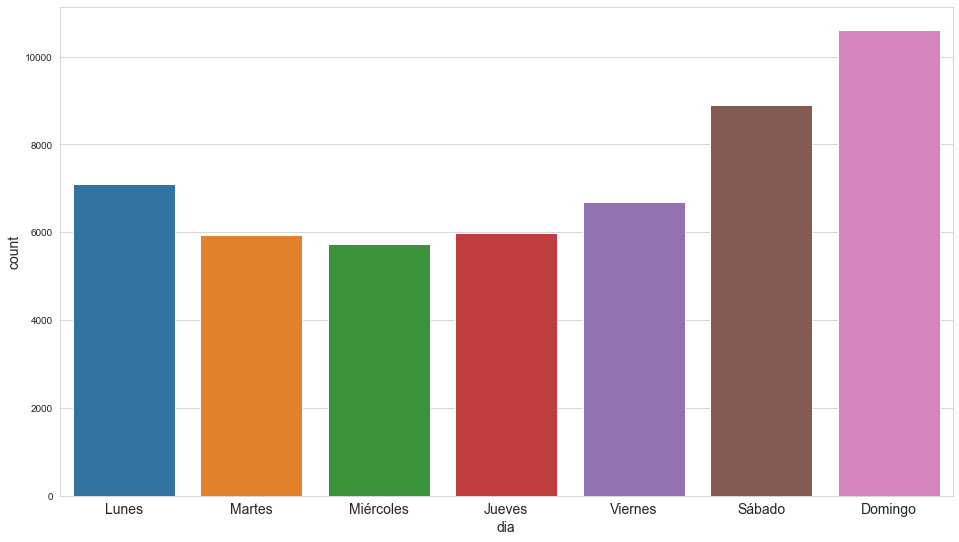

In [15]:
plt.figure(figsize=(16,9))

order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax = sns.countplot(
    data=df_f,
    x='dia',
    order=order
)


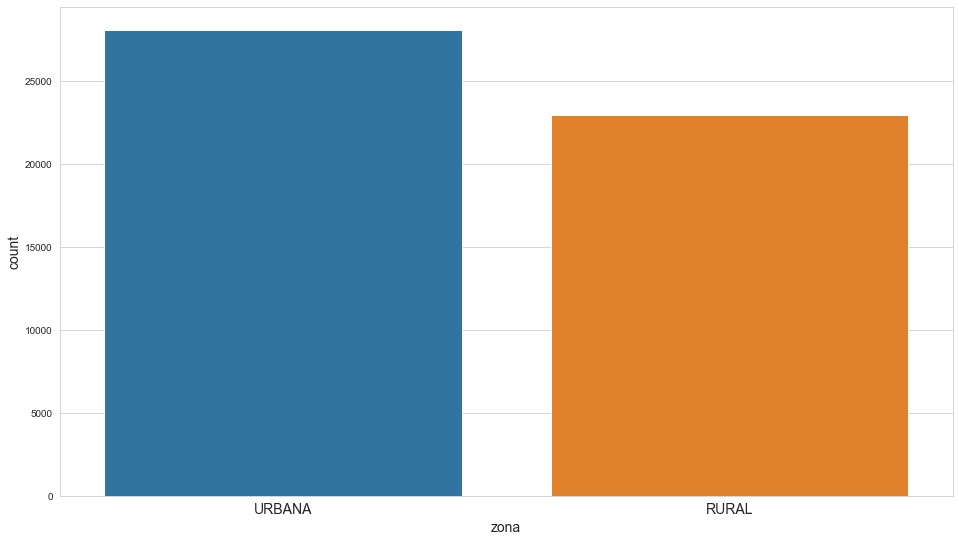

In [16]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f,
    x='zona',
)

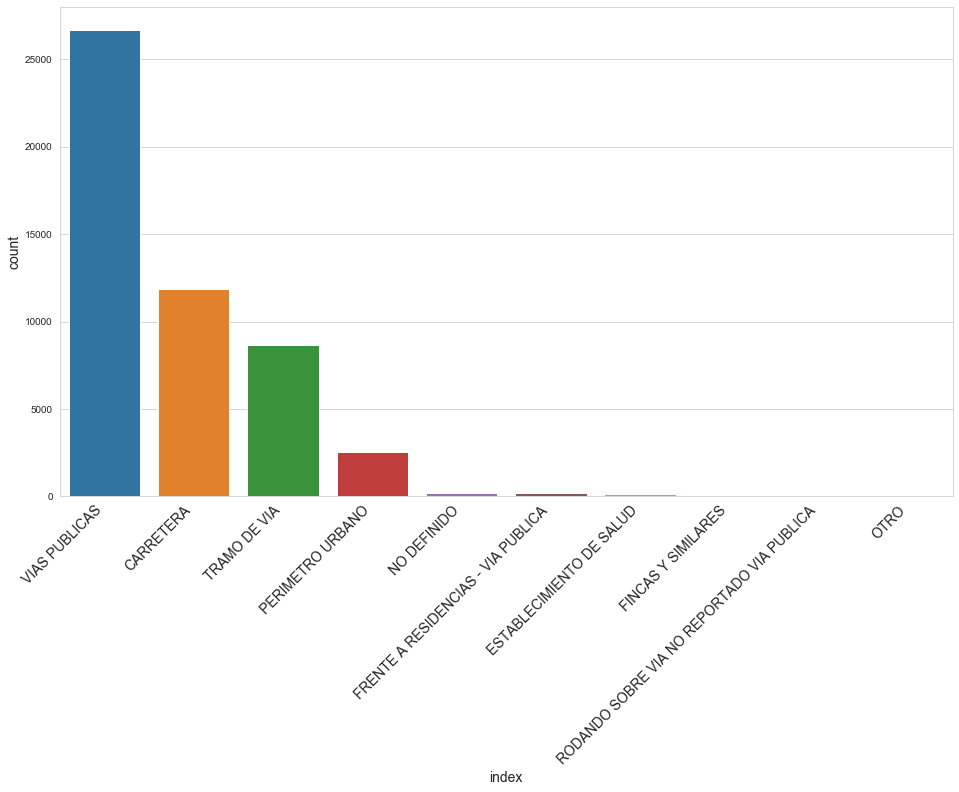

In [17]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.clase_de_sitio.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

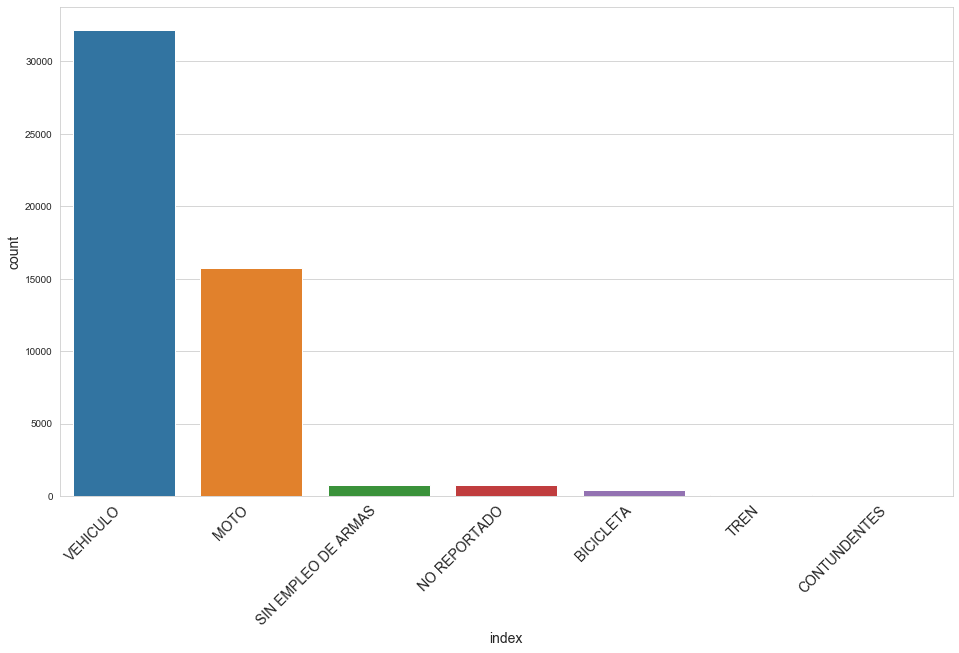

In [18]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.arma_empleada.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

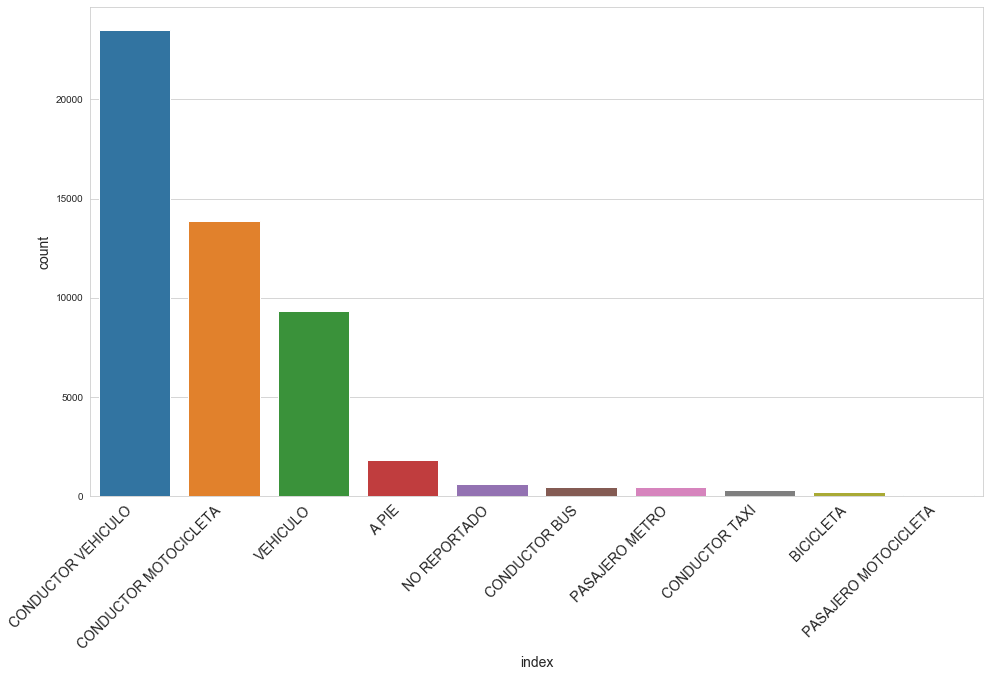

In [19]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.movil_agresor.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

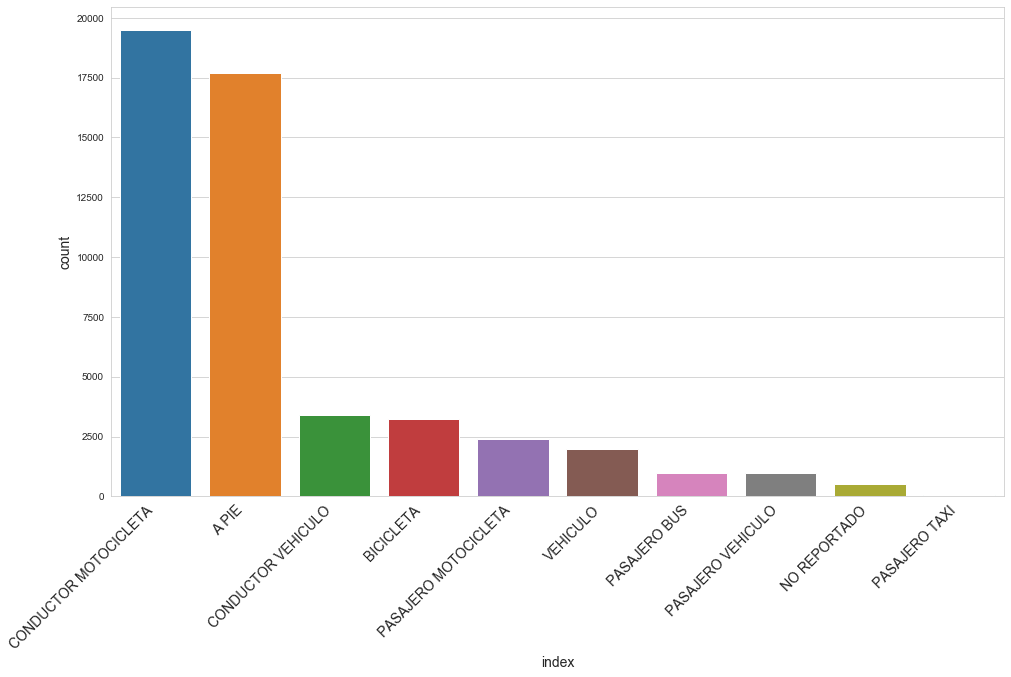

In [20]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.movil_victima.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

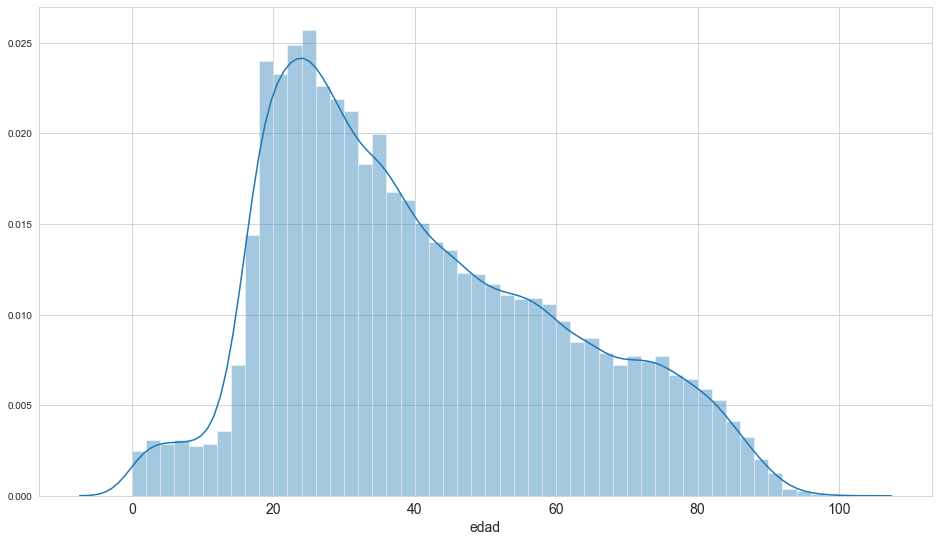

In [21]:
plt.figure(figsize=(16,9))

sns.distplot(
    df_f.edad
);

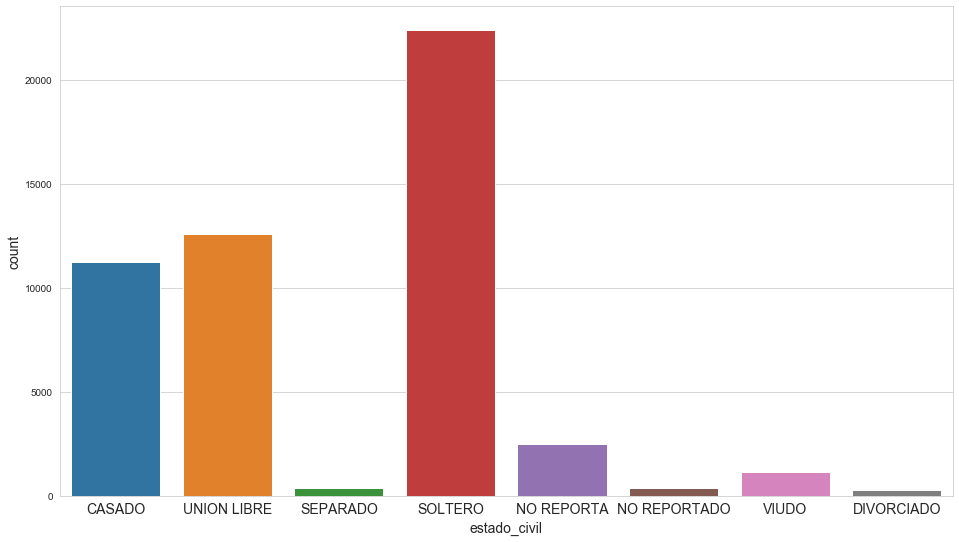

In [22]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='estado_civil',
);

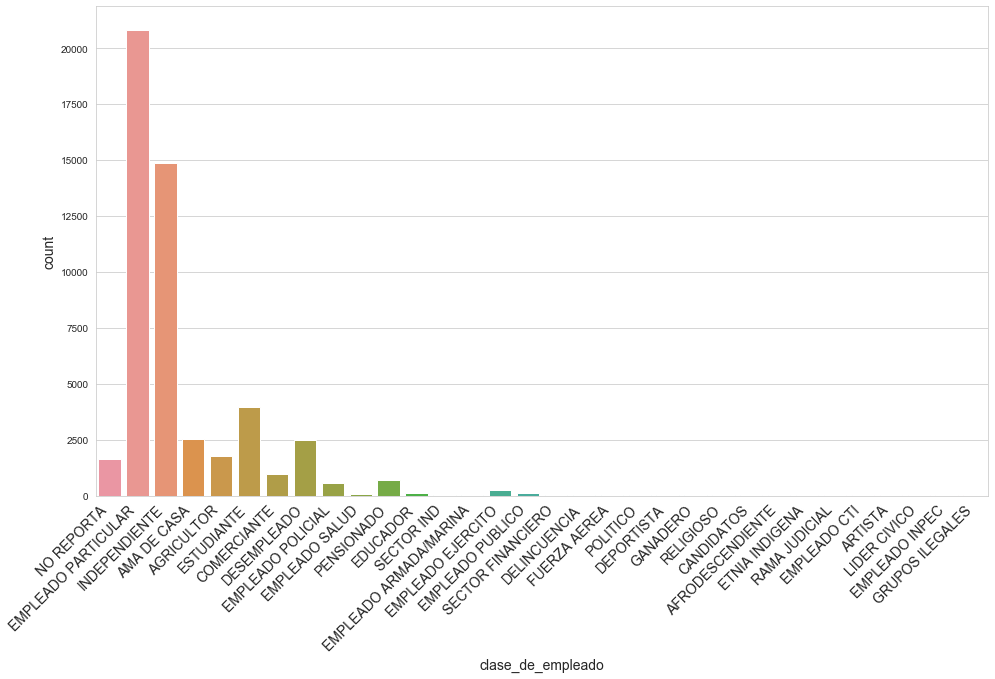

In [23]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='clase_de_empleado',
) 

plt.xticks(rotation=45, ha='right');

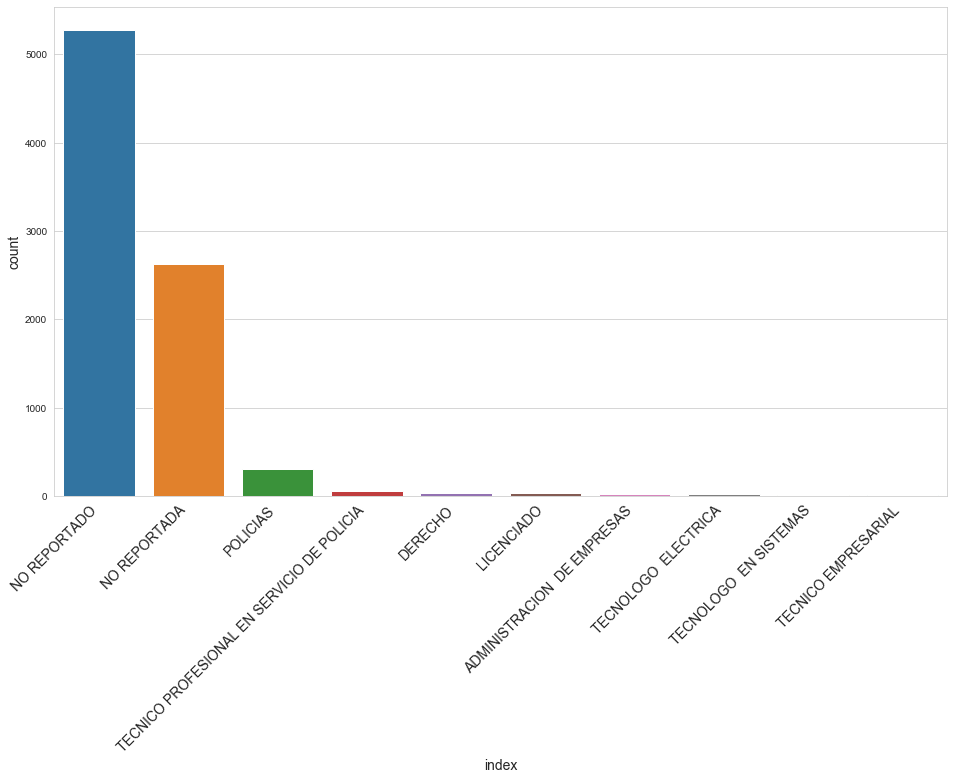

In [24]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.profesion.value_counts().to_frame('count').reset_index().head(10),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

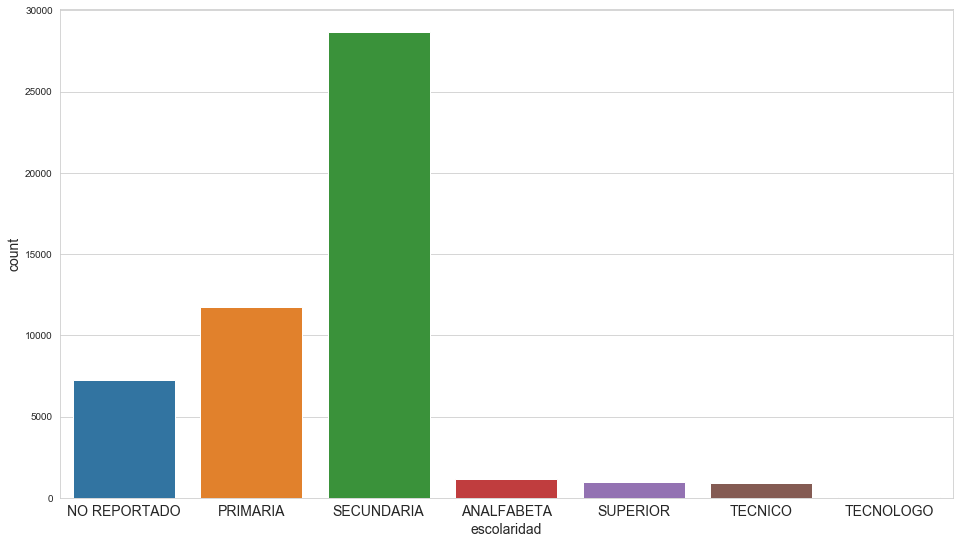

In [25]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='escolaridad',
);

In [27]:
df_f.hora = pd.to_datetime(df_f.hora, format='%H:%M:%S')
df_f['year'] = df_f.fecha.dt.year
df_f['hora_int'] = df_f.hora.dt.hour

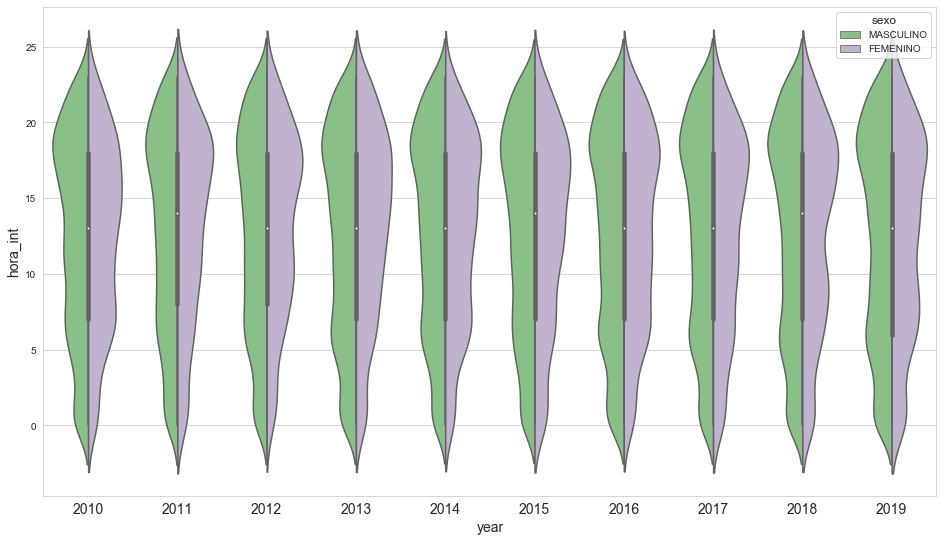

In [28]:
sns.set_palette('Set1')
fig, ax = plt.subplots(figsize=(16,9))
sns.violinplot(
    data=df_f[df_f.sexo != "NO REPORTA"],
    x='year',
    y='hora_int',
    hue='sexo',
    ax=ax,
    split=True,
    palette="Accent"
);

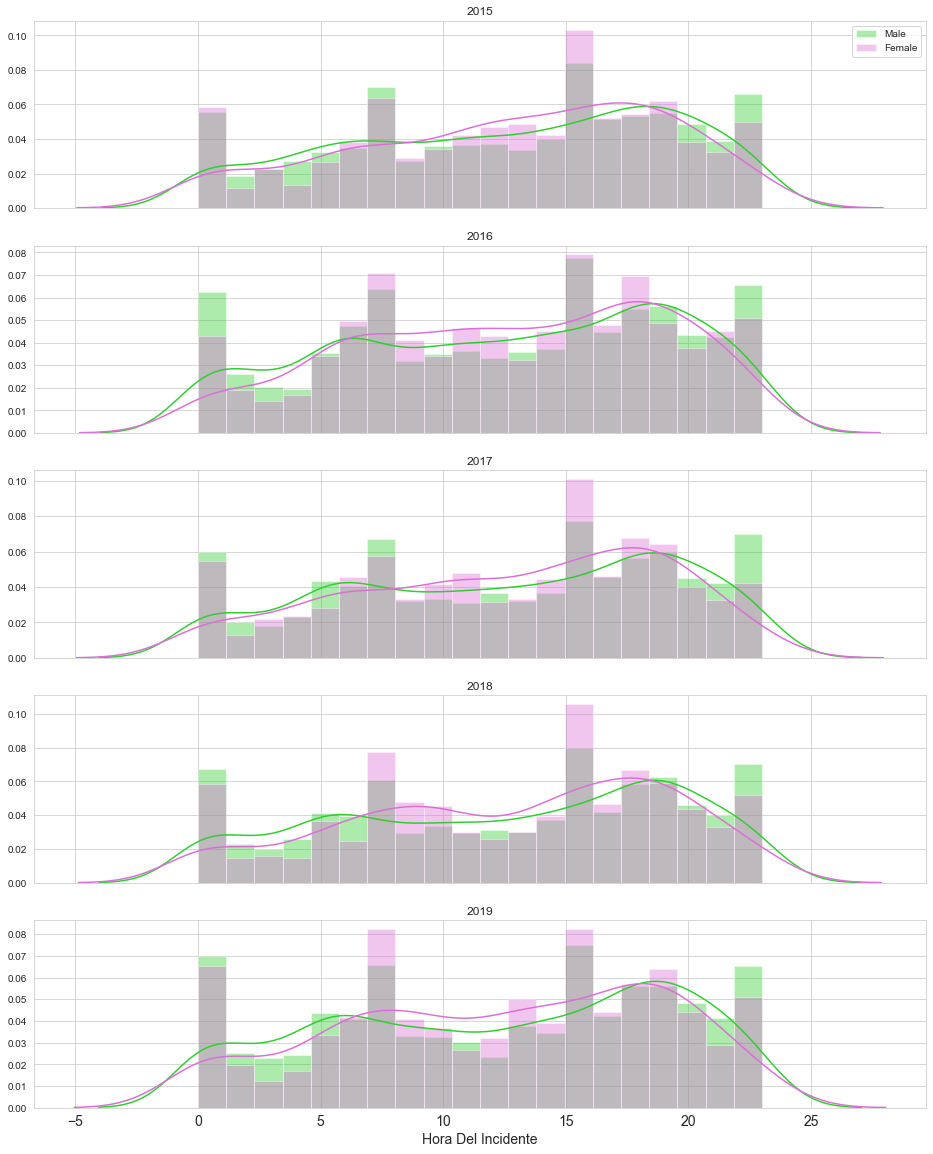

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(16,20), sharex=True)
i=0
for year in np.arange(2015,2020):
    sns.distplot(
        df_f.loc[((df_f.sexo == 'MASCULINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='limegreen',
        label='Male',
        ax=ax[i]
    )

    sns.distplot(
        df_f.loc[((df_f.sexo == 'FEMENINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='orchid',
        label='Female',
        ax=ax[i]
    )
    ax[i].set_title(str(year))
    ax[i].set_xlabel('')
    i+=1

ax[0].legend()
ax[-1].set_xlabel('Hora Del Incidente');

In [35]:
df_f['year'].value_counts()

2018    5983
2019    5775
2016    5600
2015    5334
2017    5260
2013    4908
2014    4824
2012    4535
2010    4472
2011    4282
Name: year, dtype: int64